Name : Bibidh Raj Shrestha
Student ID : 2408852
Group : L5CG2

 ## Problem - 1: Getting Started with Data Exploration

Some Warm up Exercises:

 Data Exploration and Understanding:

• Dataset Overview:

  1.Load the dataset and display the first 10 rows.

  2.Identify the number of rows and columns in the dataset.

  3.List all the columns and their data types.

In [4]:


import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv')
df = pd.DataFrame(data) #Converted to DataFrame
print("First 10 Rows of Data:\n");
df.head(10) #top10



First 10 Rows of Data:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [5]:
#Q2
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}\n")

#Q3
print("List of columns and their data types: ")
print(df.dtypes)


Number of rows: 143
Number of columns: 9

List of columns and their data types: 
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [6]:
"""Basic Statistics:

    Calculate the mean, median, and standard deviation for the Score column.
    Identify the country with the highest and lowest happiness scores. """


mean_s = df['score'].mean()
median_s = df['score'].median()
SD_s = df['score'].std()

print(f"Mean of Score: {mean_s}")
print(f"Median of Score: {median_s}")
print(f"Standard Deviation of Score: {SD_s}")
print("------------------------------------------------")


HighestScore = df[df['score'] == df['score'].max()]
LowestScore = df[df['score'] == df['score'].min()]

print("Country with Highest Score:")
print(HighestScore[['Country name', 'score']])
print("------------------------------------------------")
print("\nCountry with Lowest Score:")
print(LowestScore[['Country name', 'score']])



Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995
------------------------------------------------
Country with Highest Score:
  Country name  score
0      Finland  7.741
------------------------------------------------

Country with Lowest Score:
    Country name  score
142  Afghanistan  1.721


In [8]:
"""Missing Values:

    Check if there are any missing values in the dataset. If so, display the total count for each column. """


Missing_Values = df.isnull().sum()
print("Total count of missing values in each column:")
print(Missing_Values)



Total count of missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [9]:
""" Filtering and Sorting:

    Filter the dataset to show only the countries with a Score greater than 7.5.
    For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows. """


Filtered_Data = df[df['score']>7.5]
print("Filtered Data (Score > 7.5): ")
print(Filtered_Data['Country name'])

Filtered_Sorted_Data = Filtered_Data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 Countries with Highest GDP per Capita:")
Filtered_Sorted_Data.head(10)



Filtered Data (Score > 7.5): 
0    Finland
1    Denmark
2    Iceland
Name: Country name, dtype: object

Top 10 Countries with Highest GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [10]:
""" Adding New Columns:

    Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

Low − (Score < 4) Medium − (4 ≤ Score ≤ 6) High − (Score > 6) """

import numpy as np

conditions = [
    (df['score'] < 4),
    (df['score'] >= 4) & (df['score'] <= 6),
    (df['score'] > 6)
]

categories = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, categories)

print("Updated DataFrame with Happiness Category:")
df[['Country name', 'score', 'Happiness Category']]


Updated DataFrame with Happiness Category:


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


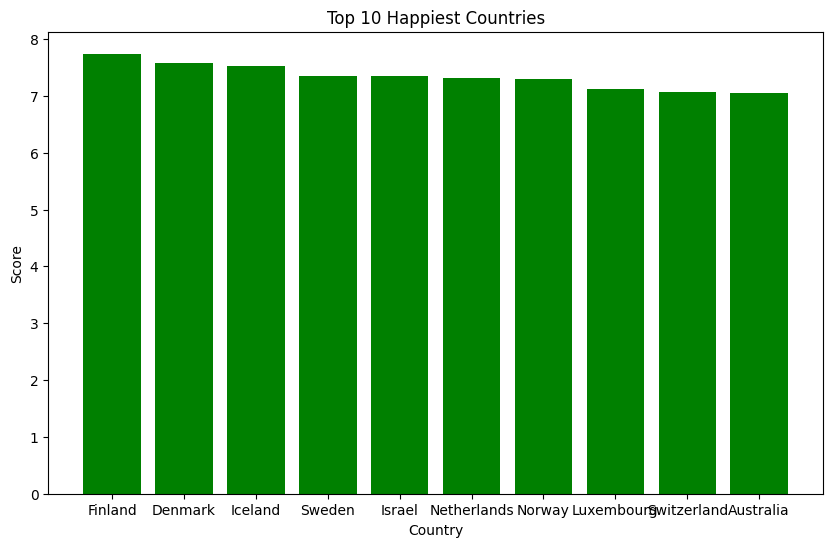

In [11]:
""" 2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship. """

import matplotlib.pyplot as plt

top_10_happy = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6));
plt.bar(top_10_happy['Country name'], top_10_happy['score'], color='green');

plt.xlabel('Country');
plt.ylabel('Score');

plt.title('Top 10 Happiest Countries');
plt.show()


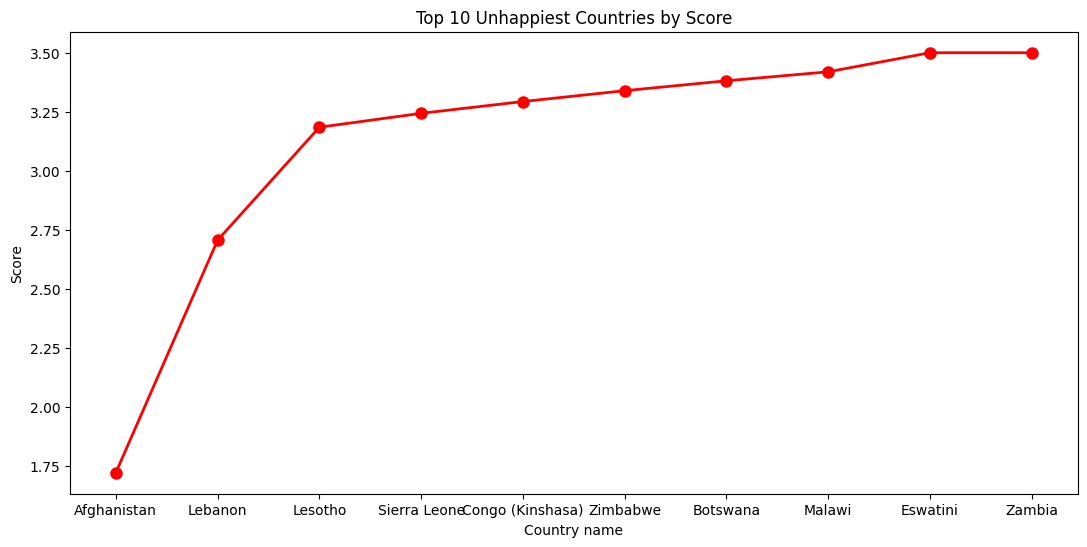

In [12]:
#Line Plotting

import matplotlib.pyplot as plt

low_scores = df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(13, 6))
plt.plot(low_scores['Country name'], low_scores['score'], marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

plt.xlabel('Country name')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Countries by Score')

plt.show()

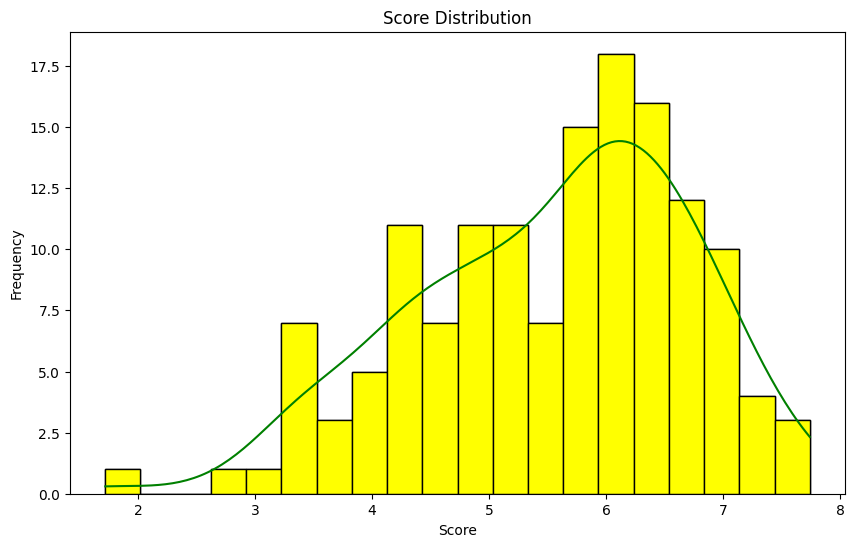

In [13]:
import seaborn as sns
# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='green', edgecolor='black')
plt.hist(df['score'], bins=20, color='yellow', edgecolor='black')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')

plt.show()



Text(0, 0.5, 'Score')

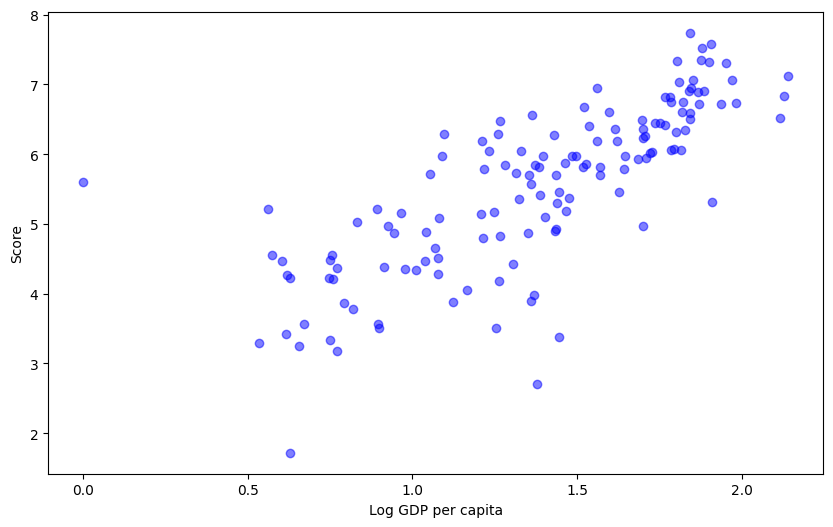

In [14]:
#Scatter Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='blue', alpha=0.5)

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')

## Problem - 2 - Some Advance Data Exploration Task:

# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

    Define the countries in South Asia with a list for example: south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

    Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
    Save the filtered dataframe as separate CSV files for future use.



In [15]:
#Q1
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Q2
southasian_filtered_data = df[df['Country name'].isin(south_asian_countries)]
print("Filtered Data: ")
print(southasian_filtered_data[['Country name']])

#Q3
southasian_filtered_data.to_csv('/content/drive/MyDrive/Dataset/Filtered_Country.csv')

Filtered Data: 
    Country name
92         Nepal
107     Pakistan
125        India
127    Sri Lanka
128   Bangladesh
142  Afghanistan




## Task - 2 - Composite Score Ranking:

# Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

1. Rank the South Asian countries based on the Composite Score in descending order.
2. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
3. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.



In [16]:
southasian_filtered_data['Composite Score'] = 0.40 * southasian_filtered_data['Log GDP per capita'] + 0.30 * southasian_filtered_data['Social support'] + 0.30 * southasian_filtered_data['Healthy life expectancy']

<ipython-input-16-913bf450facb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasian_filtered_data['Composite Score'] = 0.40 * southasian_filtered_data['Log GDP per capita'] + 0.30 * southasian_filtered_data['Social support'] + 0.30 * southasian_filtered_data['Healthy life expectancy']


In [17]:
sorted_df = southasian_filtered_data.sort_values(by='Composite Score', ascending=False)
print("South Asian Countries based on Composite Score:")
sorted_df[['Country name', 'Composite Score']]

South Asian Countries based on Composite Score:


,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


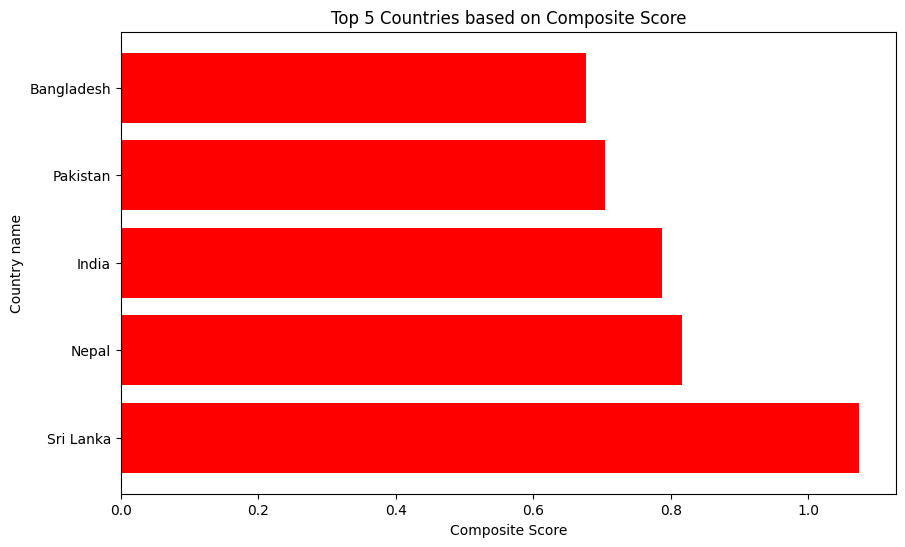

In [19]:
#QN3
Top5_Countries = sorted_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(Top5_Countries['Country name'], Top5_Countries['Composite Score'], color='red')

plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.title('Top 5 Countries based on Composite Score')

plt.show()

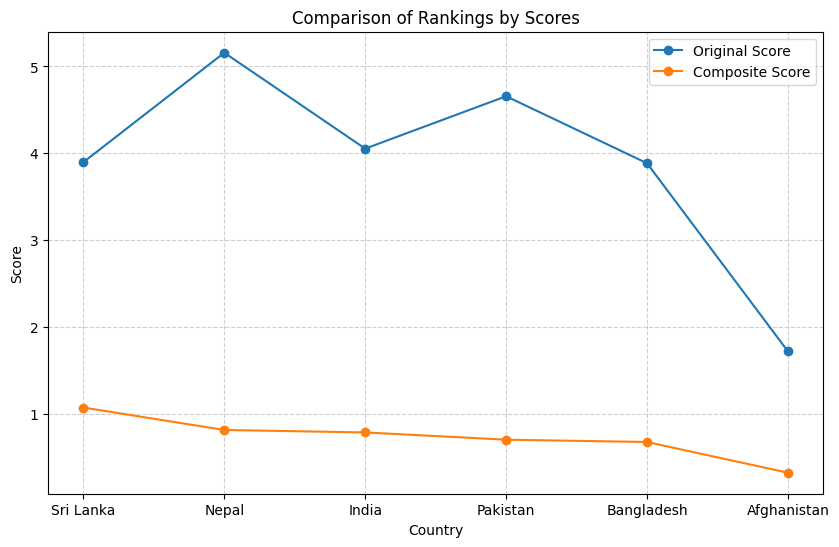

In [20]:
#QN4
plt.figure(figsize=(10, 6))
plt.plot(sorted_df['Country name'], sorted_df['score'], marker='o', label='Original Score')
plt.plot(sorted_df['Country name'], sorted_df['Composite Score'], marker='o', label='Composite Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Comparison of Rankings by Scores')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Question 4 Ans:
The rankings based on the Composite Score and the original Score do not perfectly align, though they generally correlate as
The original Score typically ranges from 2-5 as it combines broader, subjective factors like freedom, generosity, and corruption along with development indicators, leading to higher values. In contrast, the Composite Score falls within the 0-1 range because it is based on normalized economic and health indicators (GDP per capita, social support, and life expectancy), with the logarithmic scaling of GDP ensuring the score stays within a smaller, bounded range. Thus, the Composite Score is more focused and constrained compared to the broader original Score.

 Here is a graph data to back it up:



Task - 3 - Outlier Detection:

Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.



In [21]:
Data = df[df['Country name'].isin(south_asian_countries)]
df_quartiles = pd.DataFrame(Data)
Q1 = df_quartiles['score'].quantile(0.25)
Q3 = df_quartiles['score'].quantile(0.75)
IQR = Q3 - Q1

Q1_GDP = df_quartiles['Log GDP per capita'].quantile(0.25)
Q3_GDP = df_quartiles['Log GDP per capita'].quantile(0.75)
IQR_GDP = Q3_GDP - Q1_GDP
print("1st Quartile: ", Q1)
print("3rd Quartile: ", Q3)
print("Inter Quartile Range: ", IQR)
print("1st Quartile GDP: ", Q1_GDP)
print("3rd Quartile GDP: ", Q3_GDP)
print("Inter Quartile Range GDP: ", IQR_GDP)

1st Quartile:  3.8890000000000002
3rd Quartile:  4.50625
Inter Quartile Range:  0.6172499999999994
1st Quartile GDP:  0.991
3rd Quartile GDP:  1.155
Inter Quartile Range GDP:  0.16400000000000003


In [22]:
outlier_scores = Data[(Data['score'] < Q1 - 1.5 * IQR) | (Data['score'] > Q3 + 1.5 * IQR)]
outliers_GDP = Data[(Data['Log GDP per capita'] < Q1_GDP - 1.5 * IQR_GDP) | (Data['Log GDP per capita'] > Q3_GDP + 1.5 * IQR_GDP)]
outliers = pd.concat([outlier_scores, outliers_GDP])
print("Outliers in South Asia based on Score and GDP per Capita:")
outliers[['Country name','score','Log GDP per capita']]

Outliers in South Asia based on Score and GDP per Capita:


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628
142,Afghanistan,1.721,0.628


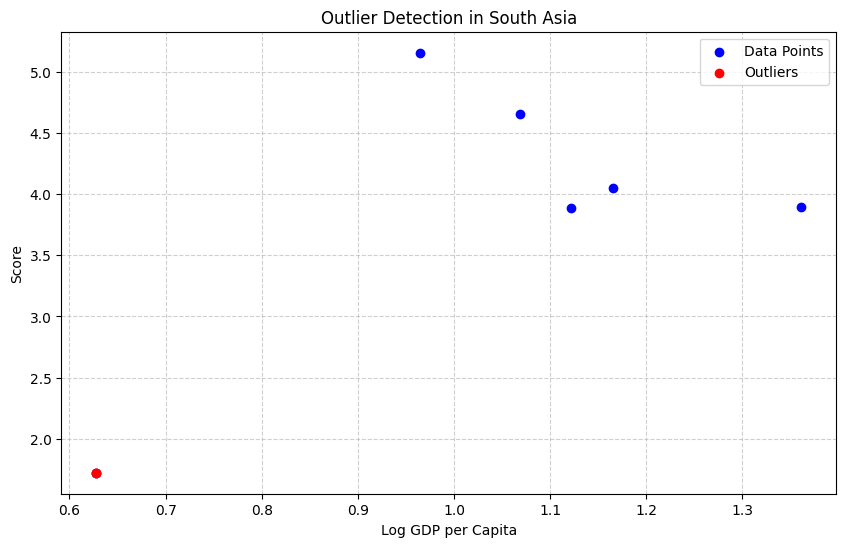

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(Data['Log GDP per capita'], Data['score'], color='blue', label='Data Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in South Asia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()



Q4 Ans:

Outlier Discussion

In the provided data and graph, we can see that among the given South Asian countries, Afghanistan is the only country meeting the criteria for being an outlier. Afghanistan has the lowest Log GDP per capita score of 0.628 and a composite score of 0.3238, where the average is 1.052, demonstrating that Afghanistan is significantly below the other listed countries. Even the next lowest score (Bangladesh, 1.122) is almost double Afghanistan’s Log GDP per capita score, indicating a substantial disparity.

Impact of Afghanistan as an Outlier Afghanistan's extreme values can skew regional averages for South Asia. If included without adjustment, it may lower overall mean happiness scores and related metrics for the region, creating a misleading representation of regional performance. Statistical analysis may need to account for or exclude Afghanistan to better understand typical trends in South Asia.


**Task - 4 - Exploring Trends Across Metrics:**

**Tasks:**
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [24]:
selected_columns = southasian_filtered_data[['score', 'Freedom to make life choices', 'Generosity']]
# Calculate Pearson correlation
correlation_matrix = selected_columns.corr(method='pearson')

# Display the correlation matrix
(correlation_matrix)

,score,Freedom to make life choices,Generosity
score,1.000000,0.800519,0.874512
Freedom to make life choices,0.800519,1.000000,0.733396
Generosity,0.874512,0.733396,1.000000


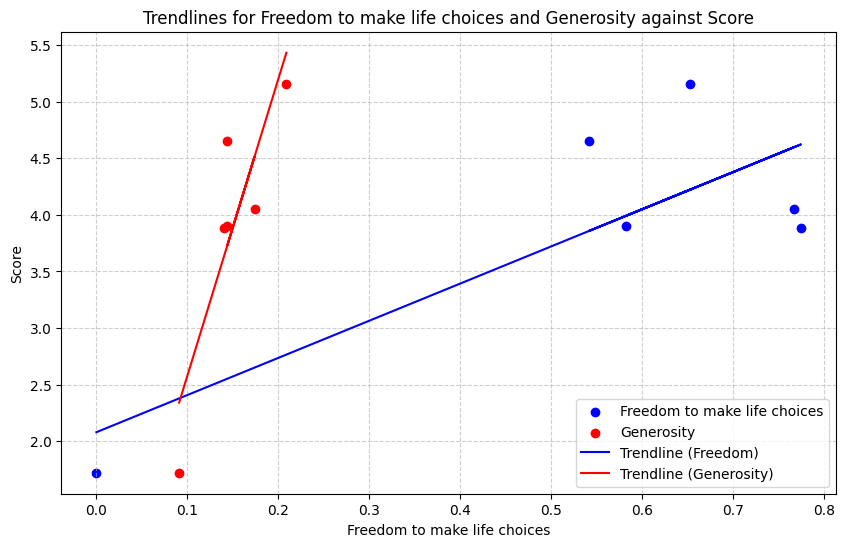

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Scatter plot for Freedom to make life choices
plt.scatter(southasian_filtered_data['Freedom to make life choices'], southasian_filtered_data['score'], color='blue', label='Freedom to make life choices')

# Scatter plot for Generosity
plt.scatter(southasian_filtered_data['Generosity'], southasian_filtered_data['score'], color='red', label='Generosity')

# Trend line for Freedom to make life choices
freedom_x = southasian_filtered_data['Freedom to make life choices']
freedom_y = southasian_filtered_data['score']
freedom_coeff = np.polyfit(freedom_x, freedom_y, 1)  # Fit a line (degree 1)
freedom_trendline = np.polyval(freedom_coeff, freedom_x)
plt.plot(freedom_x, freedom_trendline, color='blue', linestyle='-', label='Trendline (Freedom)')

# Trend line for Generosity
generosity_x = southasian_filtered_data['Generosity']
generosity_y = southasian_filtered_data['score']
generosity_coeff = np.polyfit(generosity_x, generosity_y, 1)  # Fit a line (degree 1)
generosity_trendline = np.polyval(generosity_coeff, generosity_x)
plt.plot(generosity_x, generosity_trendline, color='red', linestyle='-', label='Trendline (Generosity)')

plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Trendlines for Freedom to make life choices and Generosity against Score')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()



Question 3 Ans:

Based on the provided correlation matrix, the strongest relationship is between Score and Generosity with a correlation of 0.874512. This indicates a strong positive relationship, meaning higher generosity is associated with higher scores.

The weakest relationship is between Score and Freedom to make life choices with a correlation of 0.800519. Although this is still a strong positive relationship, it is the weakest among the three metrics provided


**Task - 5 - Gap Analysis:**

**Tasks:**
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [26]:
southasian_filtered_data['GDP-Score Gap'] = southasian_filtered_data['Log GDP per capita'] - southasian_filtered_data['score']
southasian_filtered_data[['Country name','score','Log GDP per capita','GDP-Score Gap']]

<ipython-input-26-e9a548920c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasian_filtered_data['GDP-Score Gap'] = southasian_filtered_data['Log GDP per capita'] - southasian_filtered_data['score']


,Country name,score,Log GDP per capita,GDP-Score Gap
92,Nepal,5.158,0.965,-4.193
107,Pakistan,4.657,1.069,-3.588
125,India,4.054,1.166,-2.888
127,Sri Lanka,3.898,1.361,-2.537
128,Bangladesh,3.886,1.122,-2.764
142,Afghanistan,1.721,0.628,-1.093


In [27]:
dsc_order = southasian_filtered_data.sort_values(by='GDP-Score Gap', ascending=False)
asc_order = southasian_filtered_data.sort_values(by='GDP-Score Gap', ascending=True)
print("South Asian Countries based on GDP-Score Gap in Descending Order:", dsc_order[['Country name', 'GDP-Score Gap']])
print("South Asian Countries based on GDP-Score Gap in Ascending Order:", asc_order[['Country name', 'GDP-Score Gap']])

South Asian Countries based on GDP-Score Gap in Descending Order:     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193
South Asian Countries based on GDP-Score Gap in Ascending Order:     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093


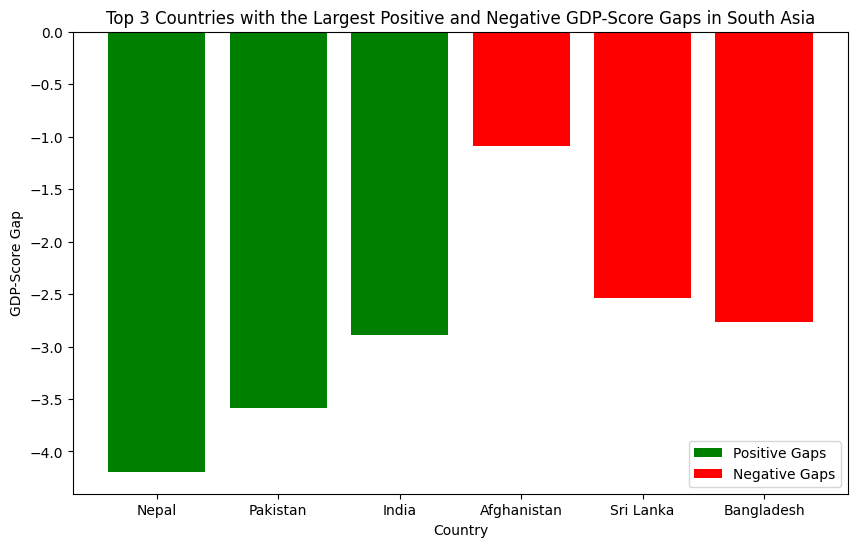

In [28]:
#Question 3
top_positive_gap = asc_order.head(3)
top_negative_gap = dsc_order.head(3)
plt.figure(figsize=(10, 6))
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='g', label='Positive Gaps')
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='r', label='Negative Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps in South Asia')
plt.legend()
plt.show()

Q4 Ans:

The GDP-Score Gap is in negative because the Log GDP per capita is lower than the score (which is derived from factors like social support, life expectancy, and freedom of choice). This indicates that these countries have a lower economic output relative to their overall well-being score. The gap suggests that economic development has not fully translated into higher scores due to
GDP being higher than the score which may be because of the factors such as poor governance, corruption, or insufficient social services in some areas.

# Problem - 3: Comparative Analysis:

**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

**Tasks:**

Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [29]:
#Task
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

ME_DF = df[df['Country name'].isin(middle_east_countries)]

ME_DF = ME_DF[~ME_DF['Country name'].isin(["Bahrain", "Palestine"])]

print("Filtered Data: ")
ME_DF[['Country name']]

Filtered Data: 


,Country name
4,Israel
12,Kuwait
21,United Arab Emirates
27,Saudi Arabia
91,Iraq
99,Iran
124,Jordan
132,Yemen
141,Lebanon


Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [30]:
#Question 1.1
mean_score_SA = southasian_filtered_data['score'].mean()
std_score_SA = southasian_filtered_data['score'].std()

mean_score_ME = ME_DF['score'].mean()
std_score_ME = ME_DF['score'].std()

print(f"Mean of Score for South Asia: {mean_score_SA}")
print(f"Standard Deviation of Score for South Asia: {std_score_SA}\n")

print(f"Mean of Score for Middle East: {mean_score_ME}")
print(f"Standard Deviation of Score for Middle East: {std_score_ME}\n")

#Q1.2
if mean_score_SA > mean_score_ME:
    print("South Asia has higher happiness scores on average.")
elif mean_score_ME > mean_score_SA:
    print("Middle East has higher happiness scores on average.")
else:
    print("Both regions have the same average happiness score.")

Mean of Score for South Asia: 3.895666666666667
Standard Deviation of Score for South Asia: 1.1770690152521504

Mean of Score for Middle East: 5.351333333333333
Standard Deviation of Score for Middle East: 1.648656346847335

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [31]:
#Question 2.1
Top3_SA = southasian_filtered_data.sort_values(by='score', ascending=False).head(3)
Bottom3_SA = southasian_filtered_data.sort_values(by='score', ascending=True).head(3)
Top3_ME = ME_DF.sort_values(by='score', ascending=False).head(3)
Bottom3_ME = ME_DF.sort_values(by='score', ascending=True).head(3)

print("Top 3 Countries in Middle East:")
print(Top3_ME[['Country name', 'score']])
print(" ")
print("Bottom 3 Countries in Middle East: ")
print(Bottom3_ME[['Country name', 'score']])
print("----------------------------------")
print("Top 3 Countries in South Asia:")
print(Top3_SA[['Country name', 'score']])
print(" ")
print("Bottom 3 Countries in South Asia: ")
print(Bottom3_SA[['Country name', 'score']])

Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
 
Bottom 3 Countries in Middle East: 
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186
----------------------------------
Top 3 Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
 
Bottom 3 Countries in South Asia: 
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898


<BarContainer object of 3 artists>

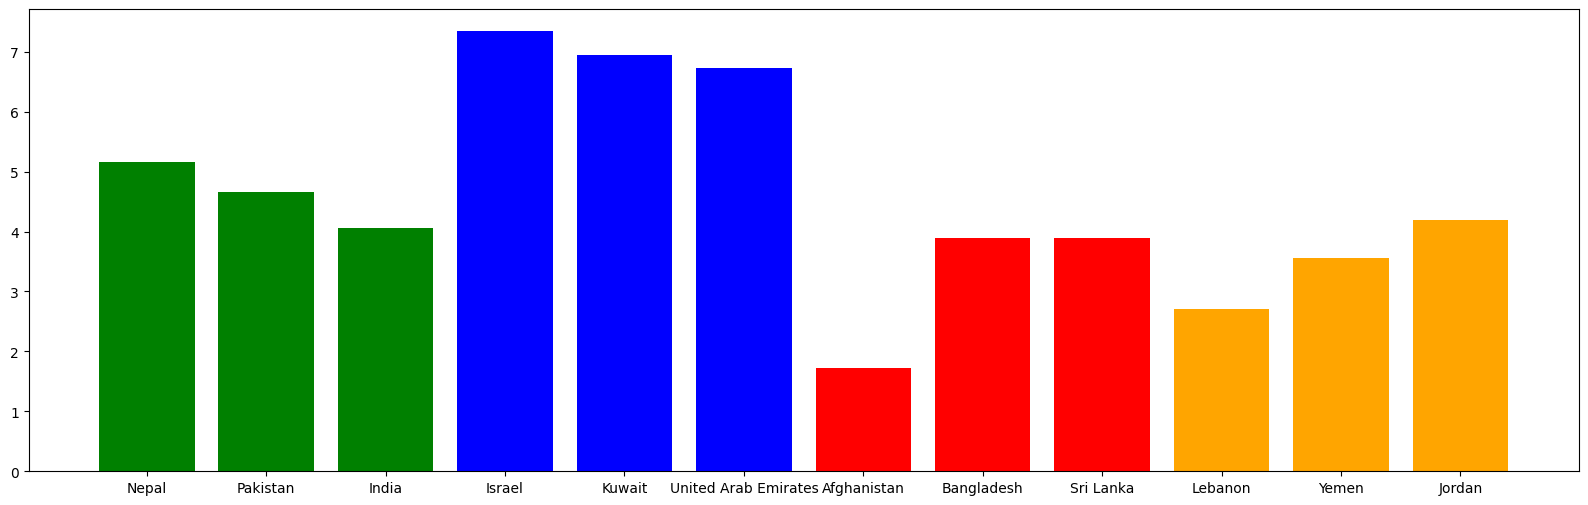

In [32]:
#Question 2.2
plt.figure(figsize=(20, 6))
plt.bar(Top3_SA['Country name'], Top3_SA['score'], color='green', label='Top 3 South Asia')
plt.bar(Top3_ME['Country name'], Top3_ME['score'], color='blue', label='Top 3 Middle East')
plt.bar(Bottom3_SA['Country name'], Bottom3_SA['score'], color='red', label='Bottom 3 South Asia')
plt.bar(Bottom3_ME['Country name'], Bottom3_ME['score'], color='orange', label='Bottom 3 Middle East')

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

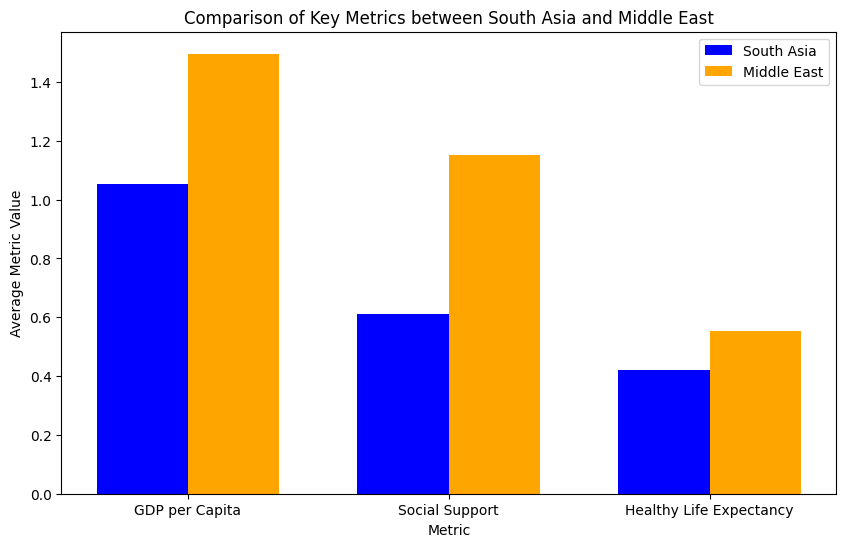

In [33]:
#Question 3.1
# Data
SA_GDP = southasian_filtered_data['Log GDP per capita'].mean()
SA_Social = southasian_filtered_data['Social support'].mean()
SA_Healthy = southasian_filtered_data['Healthy life expectancy'].mean()
ME_GDP = ME_DF['Log GDP per capita'].mean()
ME_Social = ME_DF['Social support'].mean()
ME_Healthy = ME_DF['Healthy life expectancy'].mean()

# Categories for the X-axis
categories = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy']

# Values for South Asia and Middle East
SA_values = [SA_GDP, SA_Social, SA_Healthy]
ME_values = [ME_GDP, ME_Social, ME_Healthy]

# Set positions for the bars
bar_width = 0.35  # width of the bars
index = np.arange(len(categories))  # position of each category

# Create the bars
plt.figure(figsize=(10, 6))

# South Asia bars
plt.bar(index - bar_width/2, SA_values, bar_width, label='South Asia', color='blue')

# Middle East bars
plt.bar(index + bar_width/2, ME_values, bar_width, label='Middle East', color='orange')

plt.xlabel('Metric')
plt.ylabel('Average Metric Value')
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xticks(index, categories)
plt.legend()
plt.show()

In [34]:
#Question 3.2
Disparity_GDP = abs(SA_GDP - ME_GDP)
Disparity_Social = abs(SA_Social - ME_Social)
Disparity_Healthy = abs(SA_Healthy - ME_Healthy)

if Disparity_GDP > Disparity_Social and Disparity_GDP > Disparity_Healthy:
    print("The largest disparity is in GDP per Capita.")
elif Disparity_Social > Disparity_GDP and Disparity_Social > Disparity_Healthy:
    print("The largest disparity is in Social Support.")
else:
    print("The largest disparity is in Healthy Life Expectancy.")

The largest disparity is in Social Support.


Which metrics show the largest disparity between the two regions?

Ans: As the Graph and Code shows the Social Support Disparity has the greatest



4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [35]:
#Question 4.1
Range_SA = southasian_filtered_data['score'].max() - southasian_filtered_data['score'].min()
Range_ME = ME_DF['score'].max() - ME_DF['score'].min()

CV_SA = southasian_filtered_data['score'].std() / southasian_filtered_data['score'].mean()
CV_ME = ME_DF['score'].std() / ME_DF['score'].mean()

print(f"Range of Score for South Asia: {Range_SA}")
print(f"Coefficient of Variation (CV) of Score for South Asia: {CV_SA}\n")

print(f"Range of Score for Middle East: {Range_ME}")
print(f"Coefficient of Variation (CV) of Score for Middle East: {CV_ME}")

# Compare variability
#Q4.2
if Range_ME > Range_SA:
    print("\nMiddle East has greater variability in happiness.")
else:
    print("\nSouth Asia has greater variability in happiness.")

Range of Score for South Asia: 3.4370000000000003
Coefficient of Variation (CV) of Score for South Asia: 0.3021482883337427

Range of Score for Middle East: 4.634
Coefficient of Variation (CV) of Score for Middle East: 0.30808328395054224

Middle East has greater variability in happiness.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [36]:
#Question 5.1
correlation_SA = southasian_filtered_data[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlation_ME = ME_DF[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("Correlation Matrix for South Asia:")
print(correlation_SA)
print("------------------------------------------------------------------------------")
print("\nCorrelation Matrix for Middle East:")
print(correlation_ME)


Correlation Matrix for South Asia:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  
------------------------------------------------------------------------------

Correlation Matrix for Middle East:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to ma

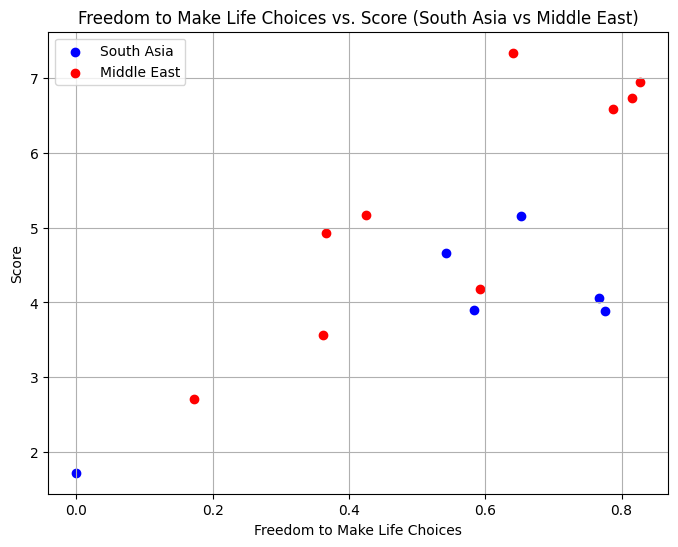

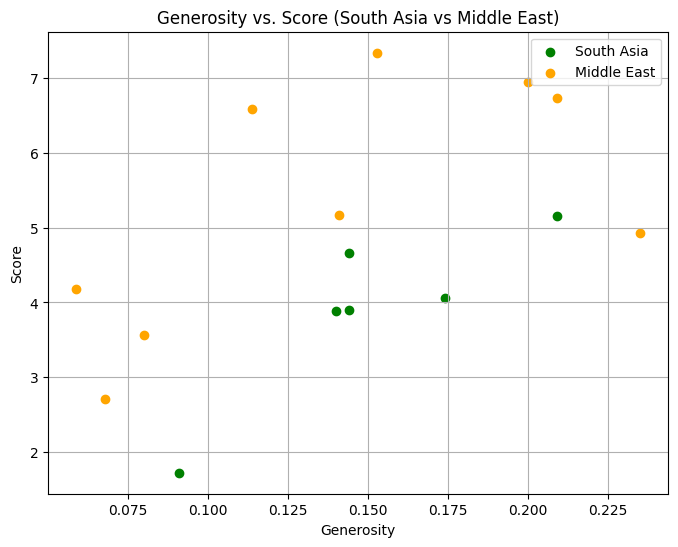

In [37]:
#Question 5.2
# Scatter plot for Freedom to Make Life Choices vs Score (South Asia and Middle East)
plt.figure(figsize=(8, 6))

# South Asia plot
plt.scatter(southasian_filtered_data['Freedom to make life choices'], southasian_filtered_data['score'], color='blue', label='South Asia')

# Middle East plot
plt.scatter(ME_DF['Freedom to make life choices'], ME_DF['score'], color='red', label='Middle East')

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Freedom to Make Life Choices vs. Score (South Asia vs Middle East)')
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot for Generosity vs Score (South Asia and Middle East)
plt.figure(figsize=(8, 6))

# South Asia plot
plt.scatter(southasian_filtered_data['Generosity'], southasian_filtered_data['score'], color='green', label='South Asia')

# Middle East plot
plt.scatter(ME_DF['Generosity'], ME_DF['score'], color='orange', label='Middle East')

plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs. Score (South Asia vs Middle East)')
plt.grid(True)
plt.legend()
plt.show()

Interpretation:

This data indicates that in South Asia scale factor Generosity has even bigger impact on the score than in the Middle East. The coefficient of Generosity and score in South Asian countries is 0.874512 which is very high than Middle East 0.627524. Furthermore, in South Asia, Freedom to make life choices demonstrated a stronger association of 0.800519 with score and a stronger association with Generosity at 0.733396. By comparison, Freedom to make life choices and Generosity have a coefficient of 0.388854 in the Middle East implication lesser interconnection between freedom and generosity in the area.

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [38]:
#The calculation for the outlier of South Asia has already been done in one of the above problems, so the direct variable (outlier) is used here.
#Q6.1
if outliers.empty:
    print("There is no outlier")
else:
    print("Outliers in South Asia based on Score and GDP per Capita:")
    print(outliers)

Outliers in South Asia based on Score and GDP per Capita:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
142                      0.088                0.672                Low  
142                      0.088                0.672                Low  


In [39]:
#Outlier check of Middle Eastern country
Data_ME = df[df['Country name'].isin(middle_east_countries)]
df_quartiles = pd.DataFrame(Data_ME)
Q1_ME = df_quartiles['score'].quantile(0.25)
Q3_ME = df_quartiles['score'].quantile(0.75)
IQR_ME = Q3_ME - Q1_ME

Q1_GDP_ME = df_quartiles['Log GDP per capita'].quantile(0.25)
Q3_GDP_ME = df_quartiles['Log GDP per capita'].quantile(0.75)
IQR_GDP_ME = Q3_GDP_ME - Q1_GDP_ME

outlier_scores_ME = Data_ME[(Data_ME['score'] < Q1_ME - 1.5 * IQR_ME) | (Data_ME['score'] > Q3_ME + 1.5 * IQR_ME)]
outliers_GDP_ME = Data_ME[(Data_ME['Log GDP per capita'] < Q1_GDP_ME - 1.5 * IQR_GDP_ME) | (Data_ME['Log GDP per capita'] > Q3_GDP_ME + 1.5 * IQR_GDP_ME)]
outliers_ME = pd.concat([outlier_scores_ME, outliers_GDP_ME])

# Check if outliers_ME is empty
if outliers_ME.empty:
    print("There is no outlier")
else:
    print("Outliers in Middle East based on Score and GDP per Capita:")
    print(outliers_ME)

There is no outlier


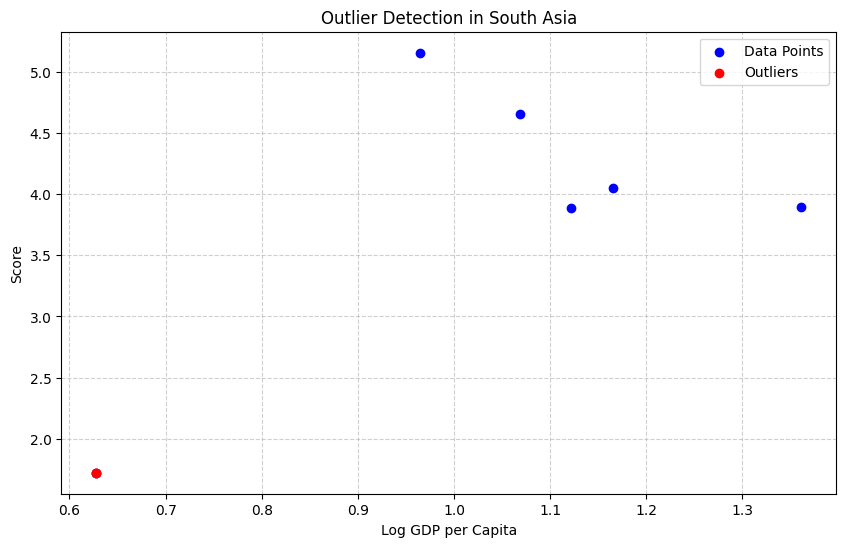

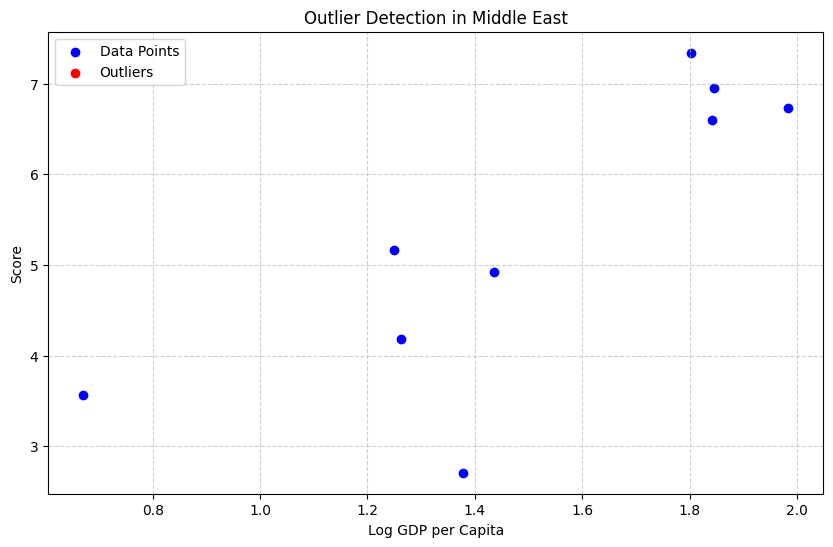

In [40]:
#Question 6.2
# Scatter plot for South Asia
plt.figure(figsize=(10, 6))
plt.scatter(southasian_filtered_data['Log GDP per capita'], southasian_filtered_data['score'], color='blue', label='Data Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in South Asia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Scatter plot for Middle East
plt.figure(figsize=(10, 6))
plt.scatter(ME_DF['Log GDP per capita'], ME_DF['score'], color='blue', label='Data Points')
plt.scatter(outliers_ME['Log GDP per capita'], outliers_ME['score'], color='red', label='Outliers')  # Assuming you have outliers_ME defined
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in Middle East')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Outlier Disscussion:

In South Asia:
As we can see from the data and the graph, the South Asian region has a clear outlier: Afghanistan. As mentioned above, Afghanistan stands out as the outlier due to its extremely low log GDP, which is 0.628 almost half of the second-lowest value. This demonstrates a significant disparity between Afghanistan and other countries in the region.

In the Middle East:
However, in the data and graph of Middle Eastern countries shown above, there are no outliers. The reason for this may be the absence of an extreme performer. In the given data, Yemen has a relatively low GDP (0.671) compared to other countries, but it compensates with a higher life expectancy value. Due to the homogeneity within the region and the lack of extreme performers, the Middle East region does not exhibit any outliers.

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

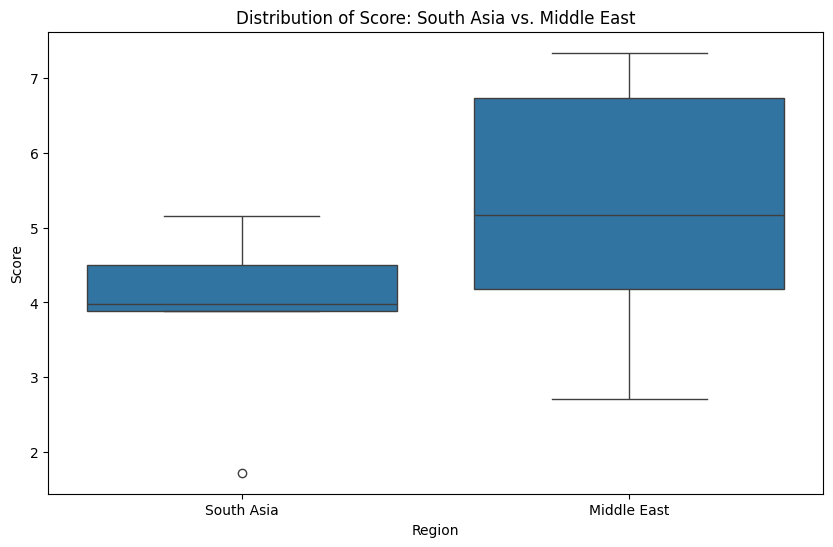

In [41]:
#Question 7.1
# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    southasian_filtered_data.assign(Region='South Asia'),
    ME_DF.assign(Region='Middle East')
]))

plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Distribution of Score: South Asia vs. Middle East')
plt.show()

Q7.2 Ans:
1. South Asia:

Median: The horizontal line inside the box represents the median score, which is around 4.

Interquartile Range (IQR): The box spans from about 4 to 5, showing that most of the data lies within this range.

Whiskers: The whiskers indicate the minimum and maximum scores that are not considered outliers, approximately between 1.7 (lower end) and 5.2 (upper end).

Outlier: There is one data point below the lower whisker (~1.7), represented as a small circle.

2. Middle East:

Median: The median score is higher, around 6.

Interquartile Range (IQR): The box spans a wider range, approximately from 4 to 7, meaning the scores are more spread out.

Whiskers: The whiskers extend from about 2 (lower end) to 7.5 (upper end), showing a greater range of scores.

Outlier : No apparent outliers in the Middle East data.